In [1]:
# import libraries possible needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# import dataset
train = pd.read_csv('spotify_data.csv')
train.head()

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.3060,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.1060,0.3080,0.000036,0.1210,0.499,88.933,4
3,16996777,rap,Juice WRLD,96,Robbery,0,240527,1,2021,0.708,...,2,-5.181,1,0.0442,0.3480,0.000000,0.2220,0.543,79.993,4
4,5988689,rap,Roddy Ricch,88,Big Stepper,0,175170,0,2021,0.753,...,8,-8.469,1,0.2920,0.0477,0.000000,0.1970,0.616,76.997,4


In [3]:
train.corr()

,artist_followers,artist_popularity,track_popularity,duration_ms,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist_followers,1.000000,0.577861,0.197426,0.040435,0.082857,0.098589,-0.010120,0.080085,-0.000119,0.123771,0.004313,-0.059933,-0.107475,-0.033986,0.002425,-0.053317,0.016524,0.030826
artist_popularity,0.577861,1.000000,0.285565,-0.097996,0.092147,0.062007,0.038784,0.039583,-0.011005,0.045165,0.018758,0.236942,-0.075715,-0.066679,0.099678,-0.034501,-0.032036,-0.033423
track_popularity,0.197426,0.285565,1.000000,0.060474,0.193685,0.568329,0.158507,0.217342,0.013369,0.296350,-0.022486,-0.056537,-0.284433,-0.124283,-0.090479,-0.038859,0.058408,0.071741
duration_ms,0.040435,-0.097996,0.060474,1.000000,-0.024226,0.067665,-0.145779,0.075990,0.007710,0.078586,-0.034818,-0.332585,-0.133960,0.067055,-0.034631,-0.155354,0.051046,0.085015
explicit,0.082857,0.092147,0.193685,-0.024226,1.000000,0.215656,0.138522,0.104734,0.011818,0.124410,-0.060350,0.077268,-0.129363,-0.039472,-0.024283,-0.032549,0.006585,0.043538
release_year,0.098589,0.062007,0.568329,0.067665,0.215656,1.000000,0.204743,0.338096,0.021497,0.430054,-0.071338,-0.032968,-0.369038,-0.149644,-0.045160,-0.070025,0.079382,0.089485
danceability,-0.010120,0.038784,0.158507,-0.145779,0.138522,0.204743,1.000000,0.137615,0.020128,0.142239,-0.051130,0.198509,-0.143936,-0.179213,-0.114999,0.505350,-0.125061,0.111015
energy,0.080085,0.039583,0.217342,0.075990,0.104734,0.338096,0.137615,1.000000,0.030824,0.747829,-0.053374,-0.043377,-0.678745,-0.131269,0.126050,0.348158,0.205960,0.170854
key,-0.000119,-0.011005,0.013369,0.007710,0.011818,0.021497,0.020128,0.030824,1.000000,0.024674,-0.139688,-0.003533,-0.023179,-0.006600,-0.011566,0.024206,0.008336,0.007738
loudness,0.123771,0.045165,0.296350,0.078586,0.124410,0.430054,0.142239,0.747829,0.024674,1.000000,-0.028151,-0.173444,-0.493020,-0.269008,0.002959,0.209588,0.171926,0.146030


In [4]:
train.corrwith(train['track_popularity']).sort_values(ascending=False)

track_popularity     1.000000
release_year         0.568329
loudness             0.296350
artist_popularity    0.285565
energy               0.217342
artist_followers     0.197426
explicit             0.193685
danceability         0.158507
time_signature       0.071741
duration_ms          0.060474
tempo                0.058408
key                  0.013369
mode                -0.022486
valence             -0.038859
speechiness         -0.056537
liveness            -0.090479
instrumentalness    -0.124283
acousticness        -0.284433
dtype: float64

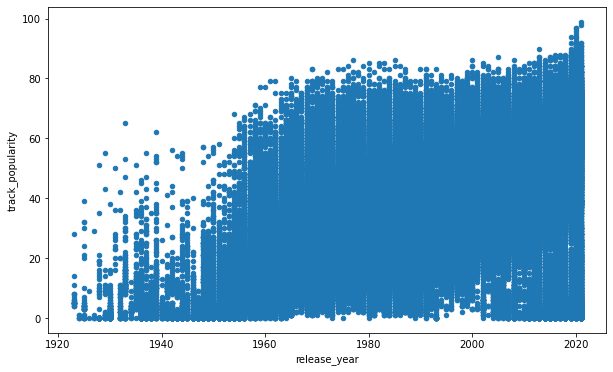

In [6]:
ax = train.plot(x = 'release_year', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'release_year', 
              ylabel = 'track_popularity')

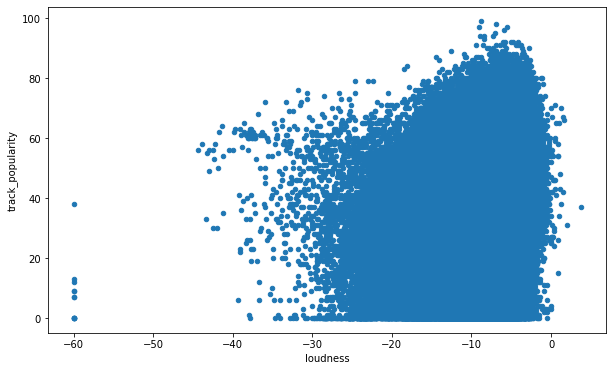

In [7]:
ax = train.plot(x = 'loudness', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'loudness', 
              ylabel = 'track_popularity')

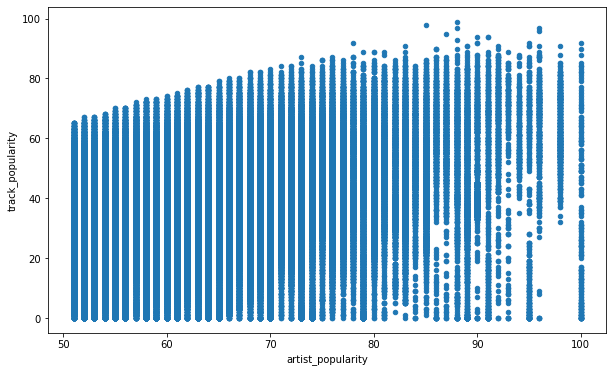

In [11]:
ax = train.plot(x = 'artist_popularity', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'artist_popularity', 
              ylabel = 'track_popularity')

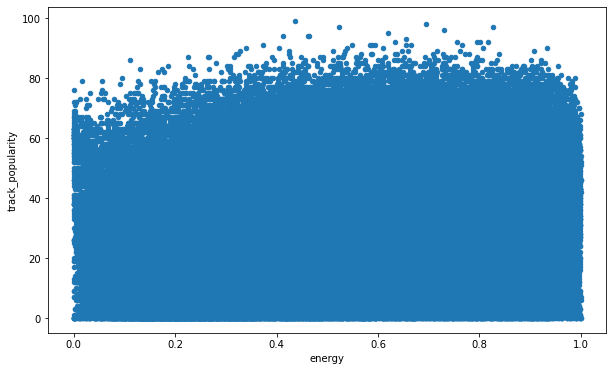

In [12]:
ax = train.plot(x = 'energy', y = 'track_popularity', kind = 'scatter',figsize=(10, 6),xlabel = 'energy', 
              ylabel = 'track_popularity')

## MLR Model

In [8]:
# goal is to predict the popularity of a song based on a variety of categorical and numeric variables
ols_object = smf.ols(formula = 'track_popularity~release_year+loudness+artist_popularity+energy+artist_followers+explicit+danceability+time_signature+duration_ms+tempo+key+mode+valence+speechiness+liveness+instrumentalness+acousticness', data = train)
model = ols_object.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:14:36   Log-Likelihood:            -9.6193e+05
No. Observations:              243190   AIC:                         1.924e+06
Df Residuals:                  243172   BIC:                         1.924e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -866.2884      3.405   -254.385      0.000    -872.963    -859.614
release_year          0.4379      0.002    259.183      0.000       0.435       0.441
loudness              0.1395      0.010     14.211      0.000       0.120       0.159
artist_popularity     0.4733      0.003    145.216      0.000       0.467       0.480
energy               -2.3957      0.218    -11.000      0.000      -2.823      -1.969
artist_followers  -1.406e-07   6.48e-09    -21.691      0.000   -1.53e-07   -1.28e-07
explicit              3.9382      0.123     32.138      0.000       3.698       4.178
danceability          5.6633      0.213     26.591      0.000       5.246       6.081
time_signature        0.1694      0.058      2.922      0.003       0.056       0.283
duration_ms        3.847e-06    2.8e-07     13.755      0.000     3.3e-06     4.4e-06
tempo                 0.0074      0.001      8.214      0.000       0.006       0.009
key                   0.0187      0.007      2.550      0.011       0.004       0.033
mode                  0.4556      0.056      8.203      0.000       0.347       0.564
valence              -1.7889      0.139    -12.842      0.000      -2.062      -1.516
speechiness          -7.4765      0.160    -46.641      0.000      -7.791      -7.162
liveness             -5.1079      0.140    -36.519      0.000      -5.382      -4.834
instrumentalness     -1.8408      0.132    -13.991      0.000      -2.099      -1.583
acousticness         -3.1518      0.115    -27.420      0.000      -3.377      -2.927
==============================================================================
Omnibus:                    12652.965   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36546.679
Skew:                          -0.252   Prob(JB):                         0.00
Kurtosis:                       4.831   Cond. No.                     7.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable Significance 
From the initial model, we can see that assuming a significance level of 0.05, all of the variables appear to be significant. If we change the significance level to 0.01, we see that key is no longer a signifiance variable. 

## Checking for non-linearity

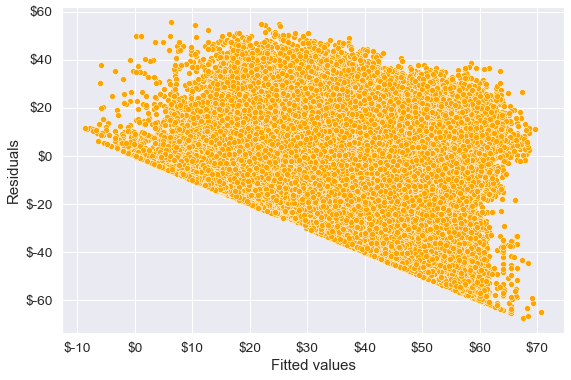

In [15]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
#sns.lineplot(x = [track_popularity.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

## Variable Interactions

In [9]:
# genre is a qualitative predictor
# checking the distribution of values of genre
train.genres.value_counts()

pop              70441
rock             49785
pop & rock       43437
miscellaneous    35848
jazz             13363
hoerspiel        12514
hip hop           7373
folk              2821
latin             2125
rap               1798
metal             1659
country           1236
electronic         790
Name: genres, dtype: int64

In [10]:
# goal is to predict the popularity of a song based on a variety of categorical and numeric variables
# adding the qualitative predictor variable 'genres'
# this model takes on the constant association assumption 
ols_object = smf.ols(formula = 'track_popularity~genres+release_year+loudness+artist_popularity+energy+artist_followers+explicit+danceability+time_signature+duration_ms+tempo+key+mode+valence+speechiness+liveness+instrumentalness+acousticness', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     6104.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:            -9.5997e+05
No. Observations:              243190   AIC:                         1.920e+06
Df Residuals:                  243160   BIC:                         1.920e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -895.8506      3.647   -245.614      0.000    -902.999    -888.702
genres[T.electronic]        0.8663      0.577      1.501      0.133      -0.265       1.997
genres[T.folk]             -5.0125      0.431    -11.626      0.000      -5.858      -4.168
genres[T.hip hop]          -1.4169      0.394     -3.595      0.000      -2.189      -0.644
genres[T.hoerspiel]        -4.1096      0.424     -9.689      0.000      -4.941      -3.278
genres[T.jazz]             -2.7154      0.378     -7.184      0.000      -3.456      -1.975
genres[T.latin]            -2.6487      0.451     -5.879      0.000      -3.532      -1.766
genres[T.metal]             0.4055      0.477      0.850      0.395      -0.529       1.340
genres[T.miscellaneous]    -0.9343      0.365     -2.561      0.010      -1.649      -0.219
genres[T.pop]              -4.1241      0.362    -11.390      0.000      -4.834      -3.414
genres[T.pop & rock]       -2.3755      0.364     -6.524      0.000      -3.089      -1.662
genres[T.rap]              -5.4445      0.471    -11.571      0.000      -6.367      -4.522
genres[T.rock]              0.1582      0.363      0.436      0.663      -0.554       0.870
release_year                0.4544      0.002    251.160      0.000       0.451       0.458
loudness                    0.2016      0.010     20.495      0.000       0.182       0.221
artist_popularity           0.4635      0.003    137.706      0.000       0.457       0.470
energy                     -3.2417      0.219    -14.829      0.000      -3.670      -2.813
artist_followers        -1.374e-07   6.57e-09    -20.924      0.000    -1.5e-07   -1.25e-07
explicit                    3.7204      0.133     28.071      0.000       3.461       3.980
danceability                6.6816      0.215     31.120      0.000       6.261       7.102
time_signature              0.1802      0.058      3.128      0.002       0.067       0.293
duration_ms              3.362e-06    2.8e-07     11.985      0.000    2.81e-06    3.91e-06
tempo                       0.0073      0.001      8.113      0.000       0.006       0.009
key                         0.0108      0.007      1.481      0.139      -0.003       0.025
mode                        0.2469      0.055      4.454      0.000       0.138       0.356
valence                    -1.9916      0.140    -14.256      0.000      -2.265      -1.718
speechiness                -5.7560      0.263    -21.927      0.000      -6.270      -5.241
liveness                   -5.1927      0.139    -37.336      0.000      -5.465      -4.920
instrumentalness           -2.3124      0.134    -17.307      0.000      -2.574      -2.051
acousticness               -2.1663      0.117    -18.442      0.000      -2.397      -1.936
===============================================

In [ ]:
#Visualizing the developed model
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale = 1.3)
x = np.linspace(train.engineSize.min(),train_updated.engineSize.max(),100)
ax = sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept'], color = 'red')
sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Semi-Auto]'], color = 'blue')
sns.lineplot(x = x, y = model.params['engineSize']*x+model.params['Intercept']+model.params['transmission[T.Manual]'], color = 'green')
plt.legend(labels=["Automatic","Semi-Automatic", "Manual"])
plt.xlabel('Engine size (in litre)')
plt.ylabel('Predicted car price')
ax.yaxis.set_major_formatter('${x:,.0f}')